In [25]:
import json

import h5py
import torch
import matplotlib.pyplot as plt

In [8]:
split_pathname = "../../data/TACoS/val.json"

In [9]:
split_data = json.load(open(split_pathname))
len(split_data.keys())

27

In [10]:
75 + 27 + 25

127

In [11]:
split_data["s34-d28.avi"].keys()

dict_keys(['timestamps', 'sentences', 'fps', 'num_frames'])

In [12]:
split_data["s34-d28.avi"]["timestamps"][0]

[201, 487]

In [13]:
split_data["s34-d28.avi"]["sentences"][0]

'The person gets out a knife.'

In [14]:
split_data["s34-d28.avi"]["fps"]

29.4

In [15]:
split_data["s34-d28.avi"]["num_frames"]

11800

In [16]:
hdf5_pathname = r"../../data/TACoS/tall_c3d_features.hdf5"

In [17]:
hdf5_file = h5py.File(hdf5_pathname, "r")
hdf5_file.keys()

<KeysViewHDF5 ['s13-d21.avi', 's13-d25.avi', 's13-d28.avi', 's13-d31.avi', 's13-d40.avi', 's13-d45.avi', 's13-d48.avi', 's13-d52.avi', 's13-d54.avi', 's14-d26.avi', 's14-d27.avi', 's14-d35.avi', 's14-d43.avi', 's14-d46.avi', 's14-d51.avi', 's15-d26.avi', 's15-d35.avi', 's15-d70.avi', 's17-d42.avi', 's17-d48.avi', 's17-d53.avi', 's17-d55.avi', 's17-d69.avi', 's21-d21.avi', 's21-d23.avi', 's21-d28.avi', 's21-d29.avi', 's21-d35.avi', 's21-d39.avi', 's21-d40.avi', 's21-d42.avi', 's21-d43.avi', 's21-d45.avi', 's21-d50.avi', 's21-d53.avi', 's21-d55.avi', 's22-d25.avi', 's22-d26.avi', 's22-d29.avi', 's22-d34.avi', 's22-d35.avi', 's22-d43.avi', 's22-d46.avi', 's22-d48.avi', 's22-d53.avi', 's22-d55.avi', 's23-d21.avi', 's23-d31.avi', 's23-d34.avi', 's23-d39.avi', 's23-d42.avi', 's23-d45.avi', 's23-d46.avi', 's23-d51.avi', 's23-d54.avi', 's24-d23.avi', 's24-d28.avi', 's24-d34.avi', 's24-d40.avi', 's24-d41.avi', 's24-d48.avi', 's24-d53.avi', 's25-d23.avi', 's25-d35.avi', 's25-d51.avi', 's25-d52.a

In [18]:
video_feature = torch.from_numpy(hdf5_file["s34-d28.avi"][:]).float()
video_feature

tensor([[0.0000, 0.0000, 0.3470,  ..., 0.0000, 0.0000, 4.4787],
        [0.0000, 0.0000, 0.2460,  ..., 0.0000, 0.0000, 4.4300],
        [0.0000, 0.0000, 0.1181,  ..., 0.0000, 0.0000, 4.5078],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [19]:
video_feature.shape

torch.Size([979, 4096])

In [20]:
sorted_keys = sorted([key for key in hdf5_file.keys()])
sorted_keys[:10]

['s13-d21.avi',
 's13-d25.avi',
 's13-d28.avi',
 's13-d31.avi',
 's13-d40.avi',
 's13-d45.avi',
 's13-d48.avi',
 's13-d52.avi',
 's13-d54.avi',
 's14-d26.avi']

In [21]:
len(sorted_keys)

127

In [22]:
video_feature_length = [hdf5_file[key].shape[0] for key in sorted_keys]
video_feature_length[:10]

[240, 240, 463, 418, 273, 357, 263, 224, 677, 1034]

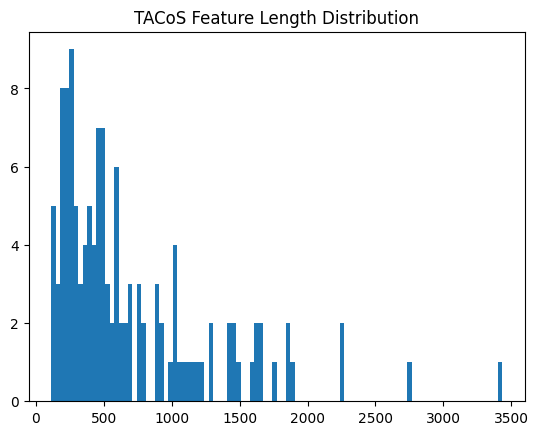

In [28]:
plt.hist(video_feature_length, bins=100)
plt.title("TACoS Feature Length Distribution")
plt.savefig("tacos.svg")